In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

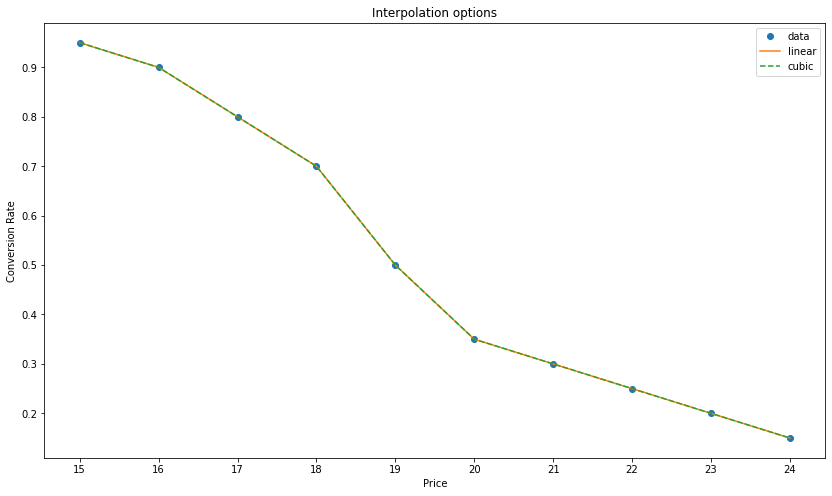

In [17]:
# discrete values of price
prices = np.linspace(15.0, 24.0, num=10, endpoint=True)

# discrete values of bids
bids = []

#customer categories
categories = ["C1", "C2", "C3", "C4"]

probabilities = [[0.95, 0.90, 0.8, 0.7, 0.5, 0.35, 0.30, 0.25, 0.20, 0.15],
                 [0.95, 0.90, 0.8, 0.7, 0.5, 0.35, 0.30, 0.25, 0.20, 0.15],
                 [0.95, 0.90, 0.8, 0.7, 0.5, 0.35, 0.30, 0.25, 0.20, 0.15],
                 [0.95, 0.90, 0.8, 0.7, 0.5, 0.35, 0.30, 0.25, 0.20, 0.15]]

plt.figure(figsize=(14,8))

#only the first one is shown uo to now
y = probabilities[0]
x = prices
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

plt.xticks(x)

plt.plot(x, y, 'o', label="data")
plt.plot(x, f(x), '-', label="linear")
plt.plot(x, f2(x), '--', label="cubic")

plt.legend(loc='best')
plt.title("Interpolation options")
plt.xlabel("Price")
plt.ylabel("Conversion Rate")

plt.show()